In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [ ]:
import pandas as pd

# Open the original CSV file for reading and a new CSV file for writing
with open('data.csv', 'r') as infile, open('cleaned.csv', 'w') as outfile:
    for line in infile:
        # Your data cleaning logic goes here
        # For example, you can check for and fix incomplete strings
        cleaned_line = line.replace('"incomplete data', '"complete data')

        # Write the cleaned line to the new file
        outfile.write(cleaned_line)

# Now you can read the cleaned data using pandas
df = pd.read_csv('cleaned.csv')


In [ ]:
import pandas as pd

# Attempt to read the CSV file with error handling
try:
    df1 = pd.read_csv('data.csv', encoding='utf-8', error_bad_lines=False)
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")
    df1 = None

if df1 is not None:
    # Select columns of interest
    df = df1[['Review Text', 'Rating', 'Class Name', 'Age']]
    df1.head()
else:
    print("CSV file couldn't be loaded due to parsing errors.")


In [ ]:
df1.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1082.0,18.0,Versatile Wonderful Cute Love Love Cute,Dress looks like it's made of,3.0,0.0,10.0,General,Jackets,Outerwear
1,827.0,45.0,"Loved, but returned Flattering Great Super cute",I'm torn! Stylish Love Wonderful,4.0,1.0,16.0,General,Dresses,Dresses
2,474.0,48.0,Not for the very petite,Super cute and cozy Great Stylish,5.0,1.0,9.0,General,Intimates,Outerwear
3,791.0,34.0,Love this Super cute Super cute Love Cute,My favorite buy Super cute Wonderful,1.0,0.0,13.0,General,Jackets,Pants
4,667.0,37.0,Flattering Great Cute Super cute Love Stylish,Love this Versatile Love Cute Love,4.0,1.0,11.0,General,Intimates,Lounge


In [ ]:
df1.shape

(43487, 10)

In [ ]:
df1.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,43486.000000,43486.000000,43486.000000,43486.000000,43486.000000
mean,795.547740,41.232075,3.645955,0.674470,5.976406
std,293.608318,12.503245,1.391089,0.468578,6.951038
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,610.000000,32.000000,3.000000,0.000000,0.000000
50%,867.000000,40.000000,4.000000,1.000000,3.000000
75%,1045.000000,51.000000,5.000000,1.000000,11.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43487 entries, 0 to 43486
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              43486 non-null  float64
 1   Age                      43486 non-null  float64
 2   Title                    39676 non-null  object 
 3   Review Text              42641 non-null  object 
 4   Rating                   43486 non-null  float64
 5   Recommended IND          43486 non-null  float64
 6   Positive Feedback Count  43486 non-null  float64
 7   Division Name            43472 non-null  object 
 8   Department Name          43472 non-null  object 
 9   Class Name               43472 non-null  object 
dtypes: float64(5), object(5)
memory usage: 3.3+ MB


In [ ]:
# fill NA values by space
df['Review Text'] = df['Review Text'].fillna('')

# CountVectorizer() converts a collection
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head()

,Review Text,Rating,Class Name,Age,Word Counts
0,Dress looks like it's made of,3.0,Outerwear,18.0,"{'dress': 1, 'it': 1, 'like': 1, 'looks': 1, '..."
1,I'm torn! Stylish Love Wonderful,4.0,Dresses,45.0,"{'love': 1, 'stylish': 1, 'torn': 1, 'wonderfu..."
2,Super cute and cozy Great Stylish,5.0,Outerwear,48.0,"{'and': 1, 'cozy': 1, 'cute': 1, 'great': 1, '..."
3,My favorite buy Super cute Wonderful,1.0,Pants,34.0,"{'buy': 1, 'cute': 1, 'favorite': 1, 'my': 1, ..."
4,Love this Versatile Love Cute Love,4.0,Lounge,37.0,"{'cute': 1, 'love': 3, 'this': 1, 'versatile': 1}"


Selected Words
love         15993
great        12950
super         7901
wonderful     5757
happy          705
dtype: int64

Class Names
Dresses    9683
Knits      8169
Blouses    6475
Pants      4708
Lounge     4034
Name: Class Name, dtype: int64


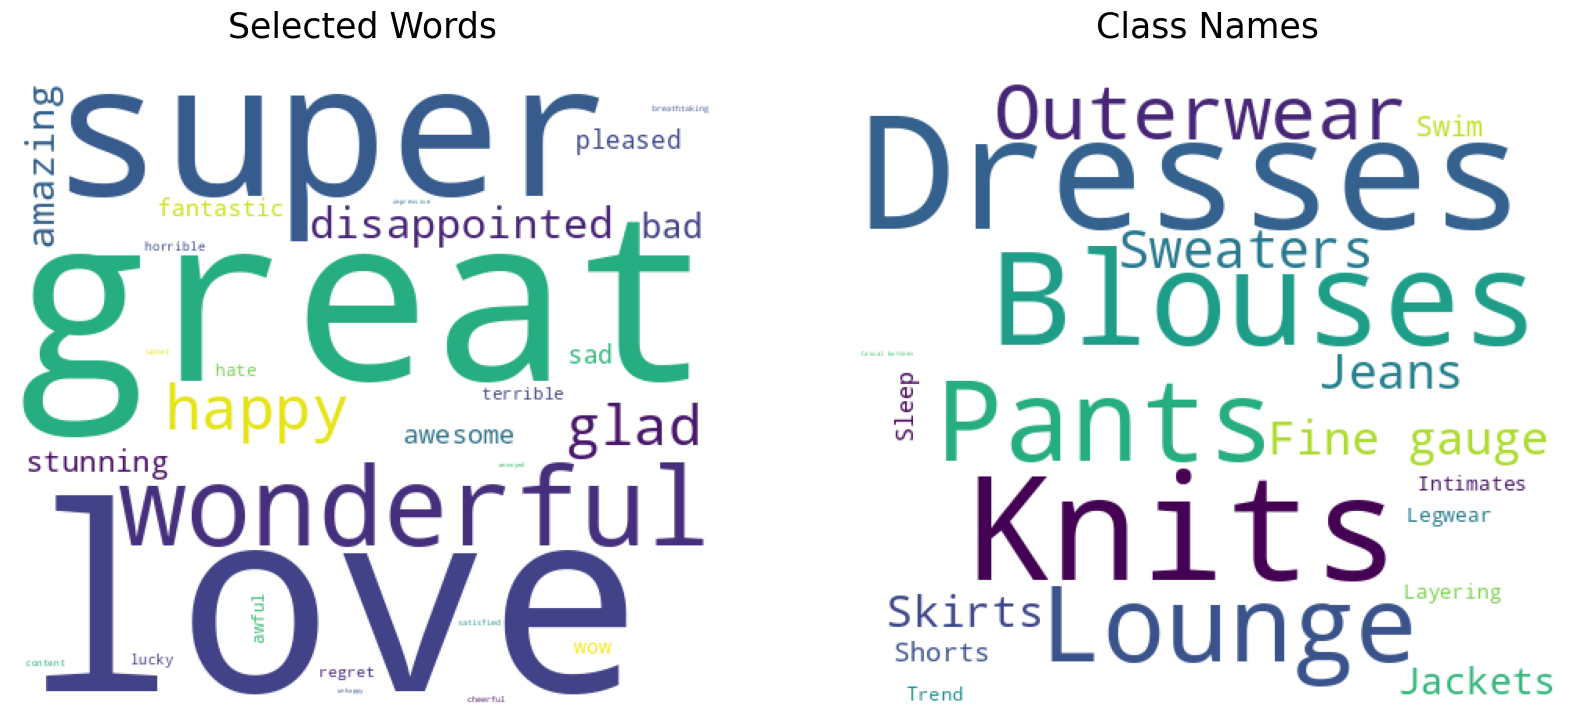

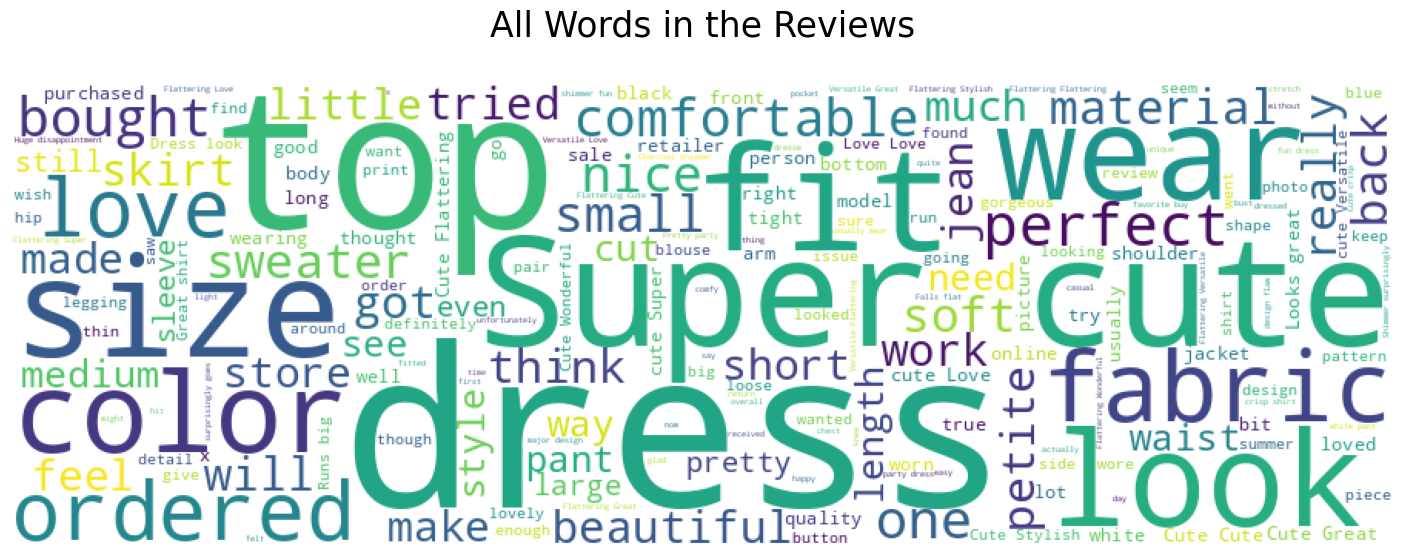

In [ ]:
# selecting some words to examine detailed
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0

dfwc = df.copy()
for word in selectedwords:
    dfwc[word] = dfwc['Word Counts'].apply(selectedcount,args=(word,))

word_sum = dfwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

print('\nClass Names')
print(df['Class Name'].fillna("Empty").value_counts().iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white',
                      width=450,
                      height=400 ).generate_from_frequencies(word_sum)

cn = df['Class Name'].fillna(" ").value_counts()
wc1 = WordCloud(background_color='white',
                      width=450,
                      height=400
                     ).generate_from_frequencies(cn)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

ax[1].imshow(wc1)
ax[1].set_title('Class Names\n',size=25)
ax[1].axis('off')

rt = df['Review Text']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

In [ ]:
df1=df['Rating'].value_counts().to_frame()
avgdf1 = df.groupby('Class Name').agg({'Rating': np.average})
avgdf2 = df.groupby('Class Name').agg({'Age': np.average})
avgdf3 = df.groupby('Rating').agg({'Age': np.average})

trace1 = go.Bar(
    x=avgdf1.index,
    y=round(avgdf1['Rating'],2),
    marker=dict(
        color=avgdf1['Rating'],
        colorscale = 'RdBu')
)

trace2 = go.Bar(
    x=df1.index,
    y=df1.Rating,
    marker=dict(
        color=df1['Rating'],
        colorscale = 'RdBu')
)

trace3 = go.Bar(
    x=avgdf2.index,
    y=round(avgdf2['Age'],2),
    marker=dict(
        color=avgdf2['Age'],
        colorscale = 'RdBu')
)

trace4 = go.Bar(
    x=avgdf3.index,
    y=round(avgdf3['Age'],2),
    marker=dict(
        color=avgdf3['Age'],
        colorscale = 'Reds')
)

fig = tools.make_subplots(rows=2, cols=2, print_grid=False)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)

fig['layout']['xaxis1'].update(title='Class')
fig['layout']['yaxis1'].update(title='Average Rating')
fig['layout']['xaxis2'].update(title='Rating')
fig['layout']['yaxis2'].update(title='Count')
fig['layout']['xaxis3'].update(title='Class')
fig['layout']['yaxis3'].update(title='Average Age of the Reviewers')
fig['layout']['xaxis4'].update(title='Rating')
fig['layout']['yaxis4'].update(title='Average Age of the Reviewers')

fig['layout'].update(height=800, width=900, showlegend=False)
fig.update_layout(
    {
        'plot_bgcolor': 'rgba(0,0,0,0)',
        'paper_bgcolor': 'rgba(0,0,0,0)'
    }
)
fig['layout'].update(plot_bgcolor='rgba(0,0,0,0)')
fig['layout'].update(paper_bgcolor='rgba(0,0,0,0)')

# Customize plot colors
fig.update_traces(marker=dict(color='rgb(255, 0, 0)', opacity=0.5))  # Set marker color to red
fig.update_layout(legend=dict(bgcolor='rgba(255, 255, 255, 0.6)'))  # Customize legend background color
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='rgba(0, 255, 0, 0.5)')  # Customize x-axis appearance
fig.update_yaxes(showline=True, linewidth=2, linecolor='blue', gridcolor='rgba(0, 0, 255, 0.5)')  # Customize y-axis appearance

py.iplot(fig)


In [ ]:
cv = df['Class Name'].value_counts()

trace = go.Scatter3d( x = avgdf1.index,
                      y = avgdf1['Rating'],
                      z = cv[avgdf1.index],
                      mode = 'markers',
                      marker = dict(size=10,color=avgdf1['Rating']),
                      hoverinfo ="text",
                      text="Class: "+avgdf1.index+" \ Average Rating: "+avgdf1['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+cv[avgdf1.index].apply(str)
                      )

data = [trace]
layout = go.Layout(title="Average Rating & Class & Number of Reviewers",
                   scene = dict(
                    xaxis = dict(title='Class'),
                    yaxis = dict(title='Average Rating'),
                    zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
plt.savefig('3D_Scatter.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Rating of 4 or higher -> positive, while the ones with
# Rating of 2 or lower -> negative
# Rating of 3 -> neutral
df = df[df['Rating'] != 3]
df['Sentiment'] = df['Rating'] >=4
df.head()

# split data
train_data,test_data = train_test_split(df,train_size=0.8,random_state=0)
# select the columns and
# prepare data for the models
X_train = vectorizer.fit_transform(train_data['Review Text'])
y_train = train_data['Sentiment']
X_test = vectorizer.transform(test_data['Review Text'])
y_test = test_data['Sentiment']

In [ ]:
#Logistic regression
start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:01.391761


## <span id="8"></span> Naive Bayes

In [ ]:
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.015401


## <span id="9"></span> Support Vector Machine (SVM)

In [ ]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:04:15.910309


## <span id="10"></span> Neural Network

In [ ]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:33:37.499100


In [ ]:
# define a dataframe for the prediction probablities of the models
df1 = train_data.copy()
df1['Logistic Regression'] = lr.predict_proba(X_train)[:,1]
df1['Naive Bayes'] = nb.predict_proba(X_train)[:,1]
df1['SVM'] = svm.decision_function(X_train)
df1['Neural Network'] = nn.predict_proba(X_train)[:,1]
df1=df1.round(2)
df1.head()


,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
6657,Love this Super cute Love Wonderful,1.0,Lounge,22.0,"{'cute': 1, 'love': 2, 'super': 1, 'this': 1, ...",False,0.57,0.02,0.70,0.41
39683,Very very boxy design/cut. try on first or buy...,2.0,Skirts,40.0,"{'90': 1, 'all': 1, 'are': 1, 'at': 1, 'beauti...",False,0.23,0.28,-0.36,0.00
42358,This skirt is beautiful- very different. it wa...,4.0,Skirts,22.0,"{'all': 3, 'and': 2, 'back': 1, 'beautiful': 1...",True,0.92,0.98,1.00,1.00
6934,My favorite buy Flattering Super cute,2.0,Outerwear,25.0,"{'buy': 1, 'cute': 1, 'favorite': 1, 'flatteri...",False,0.57,0.02,0.89,0.47
3033,Falls flat Flattering Stylish Wonderful Cute,5.0,Pants,29.0,"{'cute': 1, 'falls': 1, 'flat': 1, 'flattering...",True,0.46,0.00,0.58,0.61


In [ ]:

# define a dataframe for the predictions
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

,Review Text,Rating,Class Name,Age,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
6657,Love this Super cute Love Wonderful,1.0,Lounge,22.0,"{'cute': 1, 'love': 2, 'super': 1, 'this': 1, ...",False,True,False,True,False
39683,Very very boxy design/cut. try on first or buy...,2.0,Skirts,40.0,"{'90': 1, 'all': 1, 'are': 1, 'at': 1, 'beauti...",False,False,False,False,False
42358,This skirt is beautiful- very different. it wa...,4.0,Skirts,22.0,"{'all': 3, 'and': 2, 'back': 1, 'beautiful': 1...",True,True,True,True,True
6934,My favorite buy Flattering Super cute,2.0,Outerwear,25.0,"{'buy': 1, 'cute': 1, 'favorite': 1, 'flatteri...",False,True,False,True,False
3033,Falls flat Flattering Stylish Wonderful Cute,5.0,Pants,29.0,"{'cute': 1, 'falls': 1, 'flat': 1, 'flattering...",True,False,False,True,True


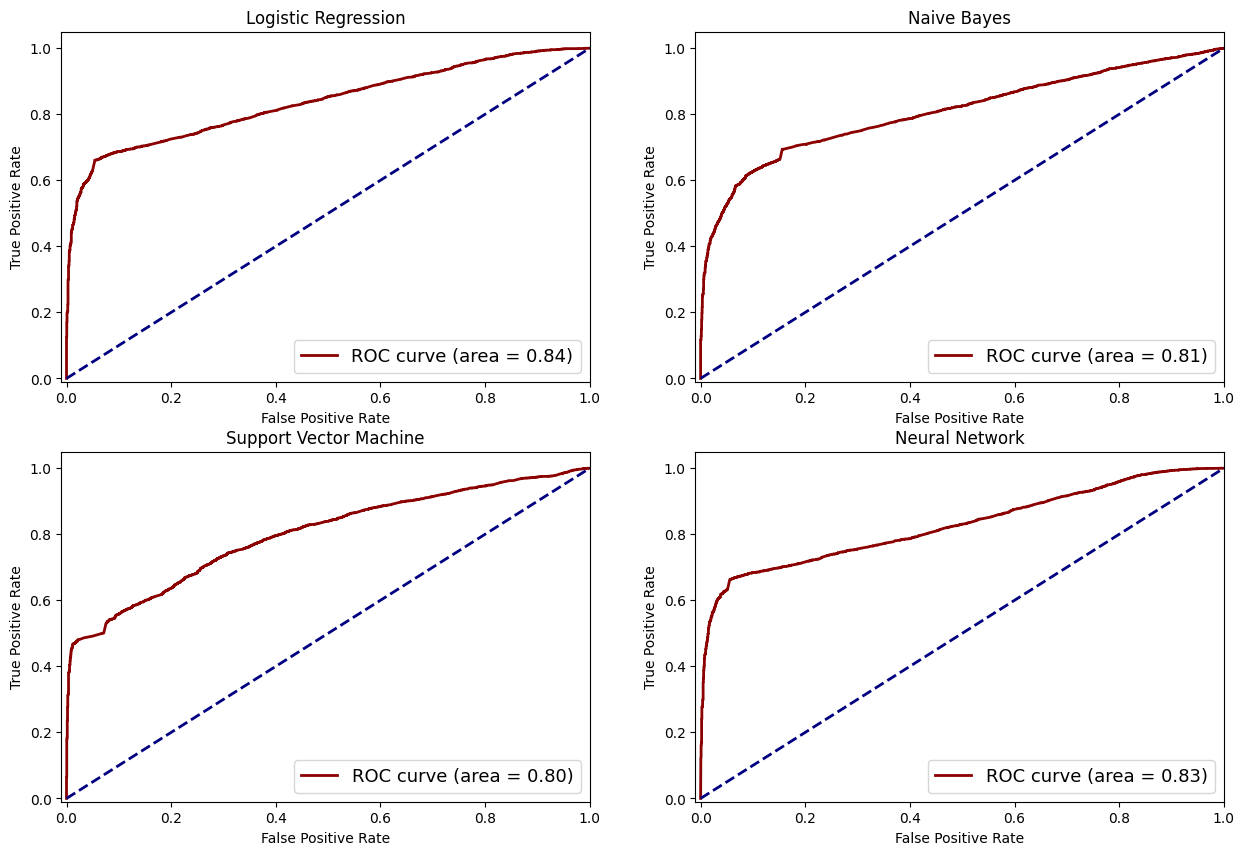

In [ ]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

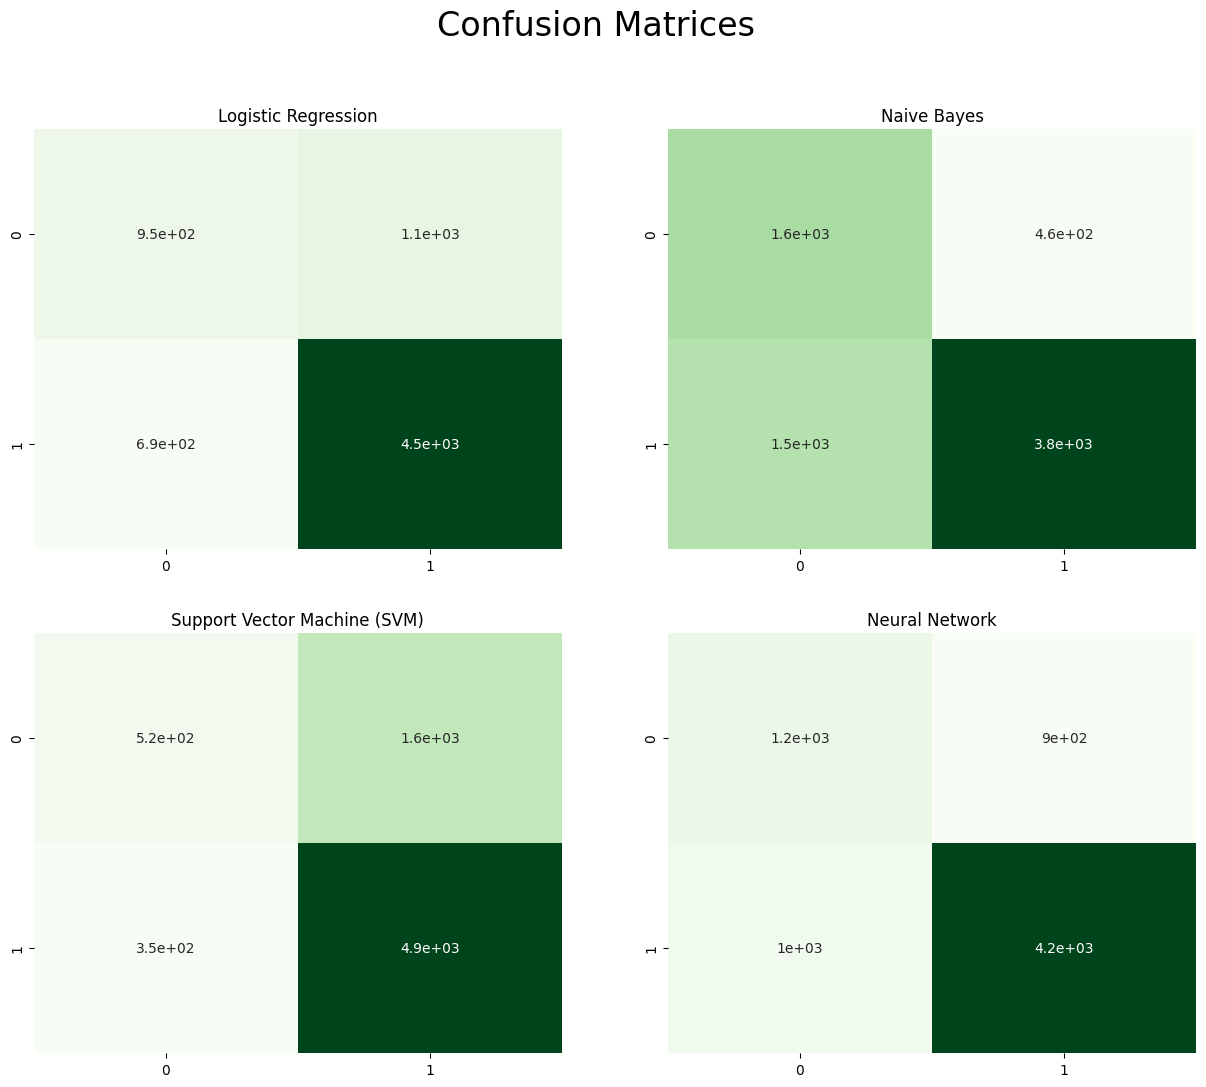

In [ ]:
# preparation for the confusion matrix
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);

## <span id="15"></span> Precision - Recall - F1-Score

Last but not least, I examined *Precision*, *Recall* and *F1-score*. They are defined as

$$\textbf{Precision} = \dfrac{TP}{TP + FP} \;\;\;\;\;\;\;\;\;\; \textbf{Recall} = \dfrac{TP}{TP + FN}$$


$$\textbf{}$$


$$\textbf{F}_{1} = 2 \; \dfrac{Precision \; \times \;Recall}{Precision + Recall} = \dfrac{2 \; TP}{2 \; TP + FN + FP}$$

We have already examined ROC curves and confusion matrices but this is not enough for a final decision. In our case precision might be the best choice to evaluate our models beacause we want to determine negative comments with less mistakes (To compare precisions, we must look at the precision values for *True*.). However, if we predict positive comments false, it will not have a negative impact. Of course for some other purposes other evaluation metrics may be useful too.

In [ ]:
print("Logistic Regression")
print(mt.classification_report(y_test, lr.predict(X_test)))
print("\n Naive Bayes")
print(mt.classification_report(y_test, nb.predict(X_test)))
print("\n Support Vector Machine (SVM)")
print(mt.classification_report(y_test, svm.predict(X_test)))
print("\n Neural Network")
print(mt.classification_report(y_test, nn.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

       False       0.58      0.46      0.51      2078
        True       0.80      0.87      0.83      5233

    accuracy                           0.75      7311
   macro avg       0.69      0.66      0.67      7311
weighted avg       0.74      0.75      0.74      7311


 Naive Bayes
              precision    recall  f1-score   support

       False       0.52      0.78      0.62      2078
        True       0.89      0.72      0.79      5233

    accuracy                           0.73      7311
   macro avg       0.71      0.75      0.71      7311
weighted avg       0.79      0.73      0.75      7311


 Support Vector Machine (SVM)
              precision    recall  f1-score   support

       False       0.59      0.25      0.35      2078
        True       0.76      0.93      0.84      5233

    accuracy                           0.74      7311
   macro avg       0.68      0.59      0.59      7311
weighted 